## KNN IRIS DATASET

In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib
from operator import itemgetter
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from scipy.spatial import distance
from decimal import Decimal

#HELPER FUNCTIONS FOR DISTANCE FORLMULA GEEKS FOR GEEKS
def my_p_root(value, root):
   my_root_value = 1 / float(root)
   return round (Decimal(value) **
   Decimal(my_root_value), 3)
def my_minkowski_distance(x, y, p_value):
   return (my_p_root(sum(pow(abs(a-b), p_value)
      for a, b in zip(x, y)), p_value))

#iris data frame
iris_data = pd.read_csv("iris.csv",names=["Sepal Length","Sepal Width","Petal Length","Petal Width","Label"])
iris_data = iris_data.astype({"Label":str})
#list of unique label names such as setosa ,versicolor, virginica...
iris_labels = iris_data.Label.unique()

X = np.array(iris_data.iloc[:,0:4])
y = np.array(iris_data.iloc[:,4])


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

iris = load_iris()

train = np.array(list(zip(X_train,y_train)))
test = np.array(list(zip(X_test, y_test)))


def findNeighbors(train_data,test_data,k,optional=False,metric = False):
    distances = [distancesTuple(train_instance,test_data,optional,metric = metric) for train_instance in train_data]
    sorted_data = sorted(distances, key=itemgetter(1))
    #print(distances[0][1])
    sorted_training = [tuple[0] for tuple in sorted_data]
    
    return sorted_training[:k]

def calcDis(p1,p2,optional = False):
    #print(f'whole instance --> {p1}')
    #print(f'Just two first values --> {p1[:2]}')
    distance = zip(p1,p2) if optional is False else zip(p1[:2],p2[:2])
    squaredD = [pow(a-b, 2) for (a,b) in distance]
    return np.sqrt(sum(squaredD))
def calcDis2(p1,p2):
    return distance.minkowski(p1[:2],p2[:2])
def distancesTuple(train_data,test_data,optional = False,metric = False):
    if metric is False:
        return (train_data,calcDis(test_data,train_data[0],optional))
    else:
        return (train_data,my_minkowski_distance(test_data,train_data[0],3))
    
    
def majorityVote(k_neighbors):
    labels = [nearest[1] for nearest in k_neighbors]
    count = Counter(labels)
    return count.most_common()[0][0] 



def knnIris (train_data,test_data,k,y_test,optional = False,metric=False):
    predictions = []
    for x in range(len(test_data)):
        neighbors = findNeighbors(train_data,test_data[x][0],k,optional = optional,metric=metric)
        predictions.append(majorityVote(neighbors))
    x = accuracy_score(y_test,predictions)
    metric_name = 'Eucledian'if metric is False else 'Minowski'
    print("The accuracy with {}-neighbors with this {} metric is {}".format(k,metric_name,100*x))
    #printResults(predictions,test_data)
   
    return predictions


def accuracyMetrics(train_data,test_data,y_test,k,optional=True,metric=False):
    predictions = []
    for x in range(1,k+1):
        predictions.append(knnIris(train_data,test_data,x,y_test,optional,metric))
    accuracy = []
    for pred in predictions:
        x = accuracy_score(y_test,pred)
        print("The accuracy is {}".format(100*x))
        accuracy.append(x)
    return accuracy
def printResults(predictions,test_data):
    for x in range(len(predictions)):
        print ('Predicted label=' + predictions[x] + ', Actual label=' + str(test_data[x][1]))

knnIris(train,test,1,y_test,optional=True)    
knnIris(train,test,2,y_test,optional=True)  
knnIris(train,test,4,y_test,optional=True,metric=False)  
knnIris(train,test,6,y_test,optional=True) 
knnIris(train,test,10,y_test,optional=True)  
knnIris(train,test,15,y_test,optional=True)  

print()

knnIris(train,test,1,y_test,optional=True,metric=True) 
knnIris(train,test,2,y_test,optional=True,metric=True) 
knnIris(train,test,4,y_test,optional=True,metric=True) 
knnIris(train,test,6,y_test,optional=True,metric=True) 
knnIris(train,test,10,y_test,optional=True,metric=True) 
knnIris(train,test,15,y_test,optional=True,metric=True) 



The accuracy with 1-neighbors with this Eucledian metric is 70.0
The accuracy with 2-neighbors with this Eucledian metric is 70.0
The accuracy with 4-neighbors with this Eucledian metric is 76.66666666666667
The accuracy with 6-neighbors with this Eucledian metric is 86.66666666666667
The accuracy with 10-neighbors with this Eucledian metric is 86.66666666666667
The accuracy with 15-neighbors with this Eucledian metric is 83.33333333333334

The accuracy with 1-neighbors with this Minowski metric is 100.0
The accuracy with 2-neighbors with this Minowski metric is 100.0
The accuracy with 4-neighbors with this Minowski metric is 100.0
The accuracy with 6-neighbors with this Minowski metric is 100.0
The accuracy with 10-neighbors with this Minowski metric is 100.0
The accuracy with 15-neighbors with this Minowski metric is 96.66666666666667


['Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica']

X_train shape: (120, 4)
Y_train shape:(150,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116412170> (for post_execute):


TypeError: iteration over a 0-d array

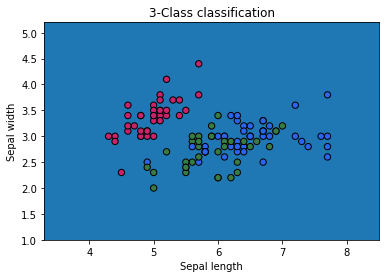

In [9]:
cmap_light = ListedColormap(['#FBBBB9', '#5EFB6E', '#82CAFF'])
cmap_bold = ListedColormap(['#CA226B', '#387C44', '#2B65EC'])
cmap_test = ListedColormap(['#8E35EF', '#FFFF00', '#659EC7'])
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape:{iris.target.shape}')
print(type(iris.target))
cor = []
lst = y_train.tolist()
for x in range(len(lst)):
    if lst[x] =="Iris-setosa":
        cor.append(0)
    elif lst[x] =='Iris-versicolor':
        cor.append(1)
    else:
        cor.append(2)
#meshstep size parameter
print(iris.target)
h = 0.2
#KNN learner
model = KNeighborsClassifier(6) #Fitting the data
model.fit(X_train[:,:2],y_train)
# Plot the decision boundary
# For using meshgrid, you need to find the min max values of both attrib utes
# We usually make min/max a little lower/higher than the actual value
# here y is representing the second attributes, do not confuse it with t he label
x_min, x_max = X_train[:, 0].min() - 1,X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# make the meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max,
h))
# add the classifier to the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plot the outcome
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=cor, cmap=cmap_bold,edgecolor='k', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("3-Class classification");


The accuracy with 1-neighbors with this Eucledian metric is 70.0
The accuracy with 2-neighbors with this Eucledian metric is 70.0
The accuracy with 3-neighbors with this Eucledian metric is 76.66666666666667
The accuracy with 4-neighbors with this Eucledian metric is 76.66666666666667
The accuracy with 5-neighbors with this Eucledian metric is 83.33333333333334
The accuracy with 6-neighbors with this Eucledian metric is 86.66666666666667
The accuracy with 7-neighbors with this Eucledian metric is 80.0
The accuracy with 8-neighbors with this Eucledian metric is 83.33333333333334
The accuracy with 9-neighbors with this Eucledian metric is 86.66666666666667
The accuracy with 10-neighbors with this Eucledian metric is 86.66666666666667
The accuracy with 11-neighbors with this Eucledian metric is 83.33333333333334
The accuracy with 12-neighbors with this Eucledian metric is 83.33333333333334
The accuracy with 13-neighbors with this Eucledian metric is 83.33333333333334
The accuracy with 14-

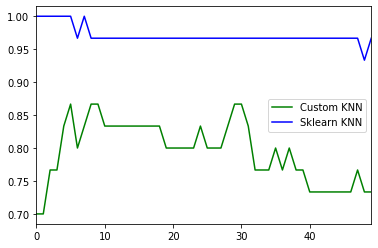

In [10]:




def metrics_builtin(k,X_train,y_train,y_test,X_test):
    accuracy = []
    for x in range(1,k+1):
        neigh=KNeighborsClassifier(n_neighbors=x)
        neigh.fit(X_train,y_train)
        accuracy.append(accuracy_score(y_test,neigh.predict(X_test)))
    return accuracy
    #print(y_test)
    #print("predicted:{}".format(neigh.predict(X_test)))
    #print("accuracy {}".format(accuracy_score(y_test,neigh.predict(X_test))))
    #print("neighbors{}".format(neigh.kneighbors(X_test)))

    
    
    
    
#built in data vs custom classfier accuracy 

knn_classifier = accuracyMetrics(train,test,y_test,50,True)
built_in = metrics_builtin(50,X_train,y_train,y_test,X_test)
#print(knn_classifier)
#print(built_in)
df1 = pd.DataFrame(knn_classifier,columns=['Custom KNN'])  
df2 = pd.DataFrame(built_in,columns=['Sklearn KNN'])
ax = df1.plot(kind = 'line',color='green',label='Custom')
df2.plot(ax = ax,color='blue')

From this you can see that my model and Sklean classifier accuracy differs abunduntly. 

Also I calculated the accuracy of k neighbors range for my custom classifcation and as the k grew my accuracy flutuated between 76 an 73

## Distributions of Sepal vs Petal 

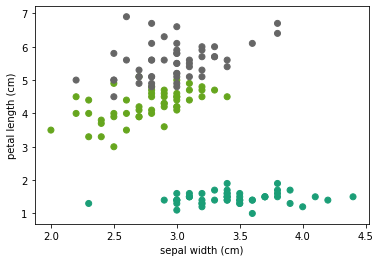

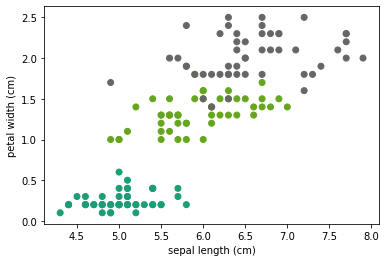

In [11]:
plt.scatter(iris.data[:,1],iris.data[:,2],c=iris.target, cmap=plt.cm.Dark2)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

plt.scatter(iris.data[:,0],iris.data[:,3],c=iris.target, cmap=plt.cm.Dark2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125bc0910>,
      dtype=object)

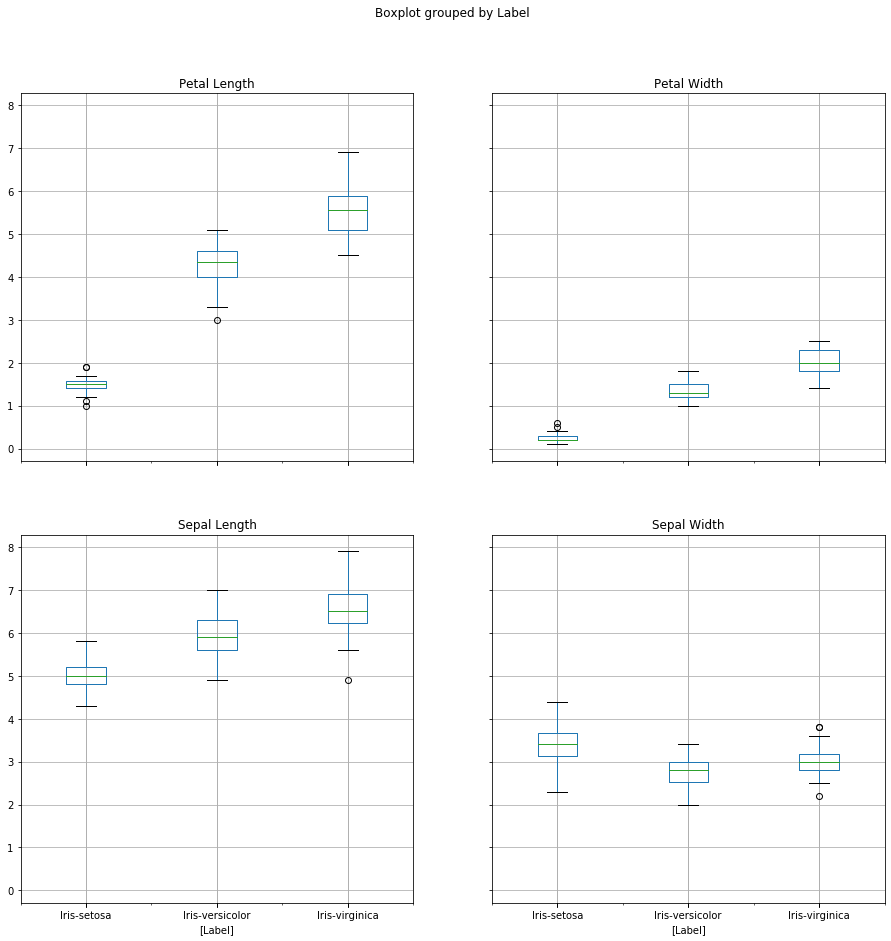

In [12]:
iris_data.boxplot(by='Label',figsize=(15,15))

## MNIST Dataset


SKLEARN KNN k=2,train_size = 500 accuracy=77.40%
Confusion matrix for training size 500
[[ 82   0   1   0   0   0   2   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  4  27  71   1   1   1   1   5   5   0]
 [  1   9   1  89   0   3   0   1   1   2]
 [  0   2   0   0  95   0   1   1   0  11]
 [  1   7   0  18   3  51   2   3   0   2]
 [  6   3   0   0   9   3  65   1   0   0]
 [  0  10   2   0   3   0   0  76   0   7]
 [  4   6   6  11   0   9   3   1  43   6]
 [  0   1   0   1  10   0   0   6   1  76]]
SKLEARN KNN k=2,train_size = 1000 accuracy=81.70%
Confusion matrix for training size 1000
[[ 83   0   0   0   1   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  4  10  89   1   1   1   2   7   1   0]
 [  1   2   4  85   0   8   1   1   3   2]
 [  0   2   0   0  92   0   2   0   0  14]
 [  1   5   0  12   4  61   2   1   0   1]
 [  6   0   0   0   1   4  76   0   0   0]
 [  0   6   1   0   4   1   0  85   0   1]
 [  6   3   8   9   2   5   3   2  49   2]
 [ 

Text(0, 0.5, 'Accuracy')

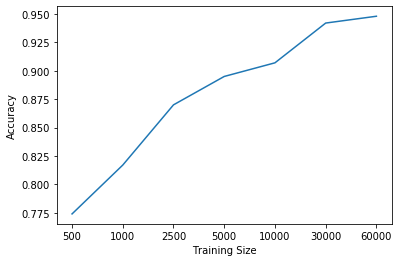

In [13]:
## MNIST Dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mnist_train = pd.read_csv("mnist_train.csv",chunksize = 10000)
mnist_train = pd.concat(mnist_train, ignore_index=True)
mnist_test = pd.read_csv("mnist_test.csv",chunksize = 1000)
mnist_test = pd.concat(mnist_test, ignore_index=True)


mnist_train.rename(columns={'5':"Number"},inplace =True)
mnist_test.rename(columns={'7':"Number"},inplace =True)



mnist_train.head()
mnist_test.head()

def mnistKnn(mnist_train,mnist_test,k,train_size,flag=True):
    X_train = np.array(mnist_train.iloc[:train_size,1:])
    y_train = np.array(mnist_train.iloc[:train_size,0])

    X_test= np.array(mnist_test.iloc[:1000,1:])
    y_test = np.array(mnist_test.iloc[:1000,0])

    if flag:
        train_mnist = np.array(list(zip(X_train,y_train)))
        test_mnist = np.array(list(zip(X_test, y_test)))
        predictions = knnIris(train_mnist,test_mnist,k,y_test,optional=False,metric=False)
        score = accuracy_score(y_test,predictions)
        print("Custom KNN k=%d,train_size=%d,accuracy=%.2f%%" % (k,train_size, score * 100))
        print (f"Confusion matrix for training size {train_size}")
        print(confusion_matrix(y_test,predictions))
        return score
    else:

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        score = accuracy_score(y_test,predictions)
        print("SKLEARN KNN k=%d,train_size = %d accuracy=%.2f%%" % (k,train_size, score * 100))
        print (f"Confusion matrix for training size {train_size}")
        print(confusion_matrix(y_test,predictions))
        return score



print()

#DUe to efficiency issues

score=[mnistKnn(mnist_train,mnist_test,2,500,False)
,mnistKnn(mnist_train,mnist_test,2,1000,False)
,mnistKnn(mnist_train,mnist_test,2,2500,False)
,mnistKnn(mnist_train,mnist_test,2,5000,False)
,mnistKnn(mnist_train,mnist_test,2,10000,False)
,mnistKnn(mnist_train,mnist_test,2,30000,False)
,mnistKnn(mnist_train,mnist_test,2,60000,False)]

plt.plot(score)
plt.xlabel('Training Size')
plt.xticks(np.arange(7), (500,1000,2500,5000,10000,30000,60000))
plt.ylabel('Accuracy')



Due to issues with effcinecy I only showed an example of how to do the classficiation error using the custom knn but otherwise I am. using the Sklearn KNN to do my accuracy and testing results


In [15]:
mnistKnn(mnist_train,mnist_test,2,50,True)


The accuracy with 2-neighbors with this Eucledian metric is 58.099999999999994
Custom KNN k=2,train_size=50,accuracy=58.10%
Confusion matrix for training size 50
[[ 45   0   1   6   0   2  18   5   2   6]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2  35  42  12   4   2   3   8   4   4]
 [  0   8   1  88   1   0   0   0   2   7]
 [  0   2   1   1  67   1   2  12   0  24]
 [  0   3   1  28   2   7  11   6   9  20]
 [  1   3   2   0   3   6  69   2   0   1]
 [  0   8   1   2  13   0   0  55   1  18]
 [  2   3   5  17   3   0   4   1  42  12]
 [  0   1   0  12  25   0   0  16   1  40]]


0.581

This is the accuracy with just a small training size on my mnist knn classfier

In [16]:
mnistKnn(mnist_train,mnist_test,2,500,True)

The accuracy with 2-neighbors with this Eucledian metric is 79.2
Custom KNN k=2,train_size=500,accuracy=79.20%
Confusion matrix for training size 500
[[ 81   0   0   0   0   0   2   0   1   1]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2  13  77   4   1   1   2   7   8   1]
 [  0   3   0  87   0   8   0   1   4   4]
 [  0   2   0   0  84   0   2   2   0  20]
 [  1   6   0  10   1  48   6   2   6   7]
 [  5   0   0   0   3   1  76   0   2   0]
 [  0   7   2   0   3   0   0  75   0  11]
 [  4   3   4   8   1   6   1   2  53   7]
 [  0   0   0   1   5   0   0   4   0  85]]


0.792